# Brief Introduction of Machine Learning

Jupyter notebook -- a web-based interactive computing platform<br>
https://jupyter.org/

### What is Machine Learning?
---
Machine learning algorithms build a ***model*** based on sample data, known as training data, in order to ***make predictions or decisions*** without being explicitly programmed to do so.

<img src="https://static.packt-cdn.com/products/9781788474399/graphics/assets/f2371275-8390-457f-bc94-2b1fb45251b9.png">
<center>normal steps for ML



### Classification of Machine Learning
---

<img src="https://www.mathworks.com/discovery/reinforcement-learning/_jcr_content/mainParsys3/discoverysubsection/mainParsys/image.adapt.full.medium.png/1675723381040.png">

> Unsupervised Learning
> + K-means

> Supervised Learning
> + SVM
> + GBDT
> + CNN
> + RNN/LSTM

> Reinforcement Learning
> + Q-learning

### Unsupervised Learning
---

#### K-means
---
***K-Means Clustering*** is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png">

The working of the K-Means algorithm is explained in the below steps: <br>
+ Step-1: Select the number K to decide the number of clusters.
+ Step-2: Select random K points as the center
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning3.png">
+ Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning4.png">
+ Step-4: Calculate the variance and place a new centroid of each cluster.
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning6.png">
+ Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.
+ Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning7.png">

##### K-means Demo

In [68]:
from sklearn.datasets import load_digits

digits = load_digits()
print("total number of dataset size={}".format(digits.data.shape[0]))

total number of dataset size=1797


<Figure size 640x480 with 0 Axes>

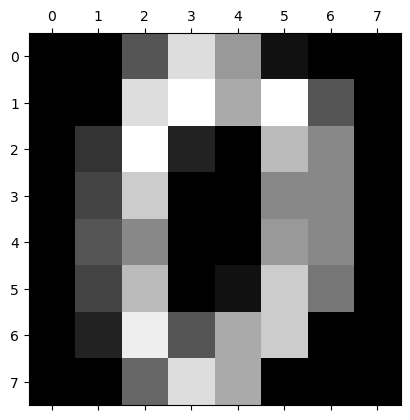

label of image: 0


In [14]:
import pylab as pl
n = 0
pl.gray()
pl.matshow(digits.images[n])
pl.show()
print("label of image: {}".format(digits.target[n]))

In [62]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split  

# preprocess data

#  -----> split dataset
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.25)
print("training data size={}, testing data size={}".format(X_train.shape[0], X_test.shape[0]))


# -----> normalize
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

training data size=1347, testing data size=450


In [69]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, n_init=10, random_state=9)
model.fit(X_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=10, n_init=10, random_state=9)

In [70]:
Y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict))

0.0022222222222222222


<Figure size 640x480 with 0 Axes>

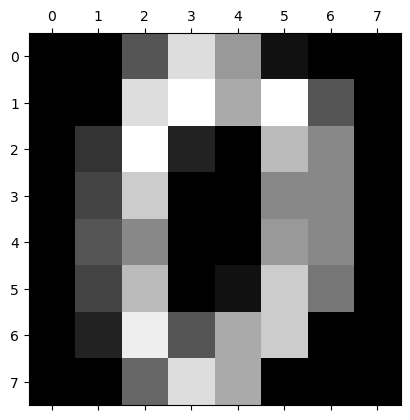

predict label = [2]


In [65]:
n = 0

pl.gray()
pl.matshow(digits.images[n])
pl.show()

y_test_case = model.predict(digits.data[n:n+1])

print("predict label = {}".format(y_test_case))

### Supervised Learning

#### SVM (Support Vector Machine)
---
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm5.png">

##### SVM Demo

In [20]:
from sklearn import svm

model = svm.SVC(kernel = 'linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [21]:
Y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict))

0.9866666666666667


<Figure size 640x480 with 0 Axes>

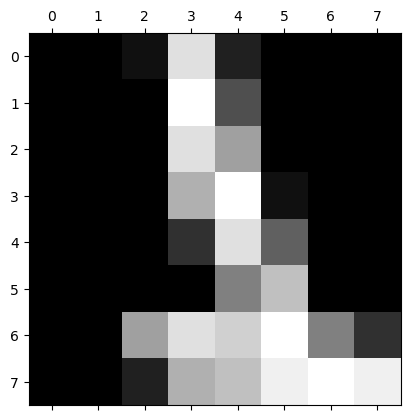

predict label = [1]


In [22]:
n = 1000

pl.gray()
pl.matshow(digits.images[n])
pl.show()

y_test_case = model.predict(digits.data[n:n+1])

print("predict label = {}".format(y_test_case))

#### XGBoost
---

An implementation of the boosting algorithm. 
<br>Therefore, it uses multiple base learners, and each base learner is relatively simple to avoid overfitting. 
<br>The next learner is the result of learning the previous base learner

<img src="https://www.researchgate.net/publication/345327934/figure/fig3/AS:1022810793209856@1620868504478/Flow-chart-of-XGBoost.png">

##### Decision Tree
<img src="https://christophm.github.io/interpretable-ml-book/images/tree-artificial-1.jpeg">
Feature Selection based on $$Gini(D)=1-\sum_{k=1}^{K} \frac{1}{p_k^2}$$
Where G is the Gini index over all classes, pk are the proportion of training instances with class k in the rectangle of interest

##### XGBoosting Demo

In [23]:
%pip install -i https://pypi.tuna.tsinghua.edu.cn/simple xgboost

from xgboost import XGBClassifier

boost = XGBClassifier() 

boost.fit(X_train,Y_train) 

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [24]:
Y_predict = boost.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict))

0.9844444444444445


#### BP Nerual Network
---
<img src="https://www.researchgate.net/publication/263653101/figure/fig1/AS:296576925880321@1447720857173/Basic-structure-of-BP-neural-network.png">

##### Steps for training:
+ step 1: error front propagation
+ step 2: error back propagation
+ step 3: repeat 2 until complete
<img src="https://static.hindawi.com/articles/js/volume-2022/2045811/figures/2045811.fig.001.jpg">

##### BP Demo

In [25]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    solver='adam',
    activation = 'relu',
    max_iter = 1000,
    alpha = 1e-3,
    hidden_layer_sizes = (64,32),
    random_state = 1
)

model.fit(X_train, Y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(64, 32), max_iter=1000,
              random_state=1)

In [26]:
Y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict))

0.98


<Figure size 640x480 with 0 Axes>

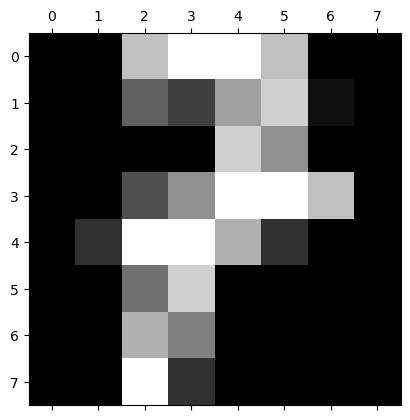

predict label = [7]


In [27]:
n = 1200

pl.gray()
pl.matshow(digits.images[n])
pl.show()

y_test_case = model.predict(digits.data[n:n+1])

print("predict label = {}".format(y_test_case))

#### Convolution Nerual Network
---
1998, LeCun designed Lenet-5.It was one of the earliest CNNs and promoted the development of deep learning.
<br> CNN will shine until the 2012 ILSVRC competition. 
<br>Alex Krizhevsky designed AlexNet, The lowest datapoint for 2012 is AlexNet.

<img src="https://www.researchgate.net/profile/David-Hall-59/publication/338476412/figure/fig1/AS:845273500753920@1578540315042/Performance-in-ILSVRC-over-2011-20161-The-lowest-datapoint-for-2012-is-AlexNet2.ppm" width=300px>

##### CNN  Architecture
<img src="https://viso.ai/wp-content/uploads/2021/10/how-vgg-works-convolutional-neural-network.jpg">

##### Convolution Layer — The Kernel
<img src="https://d33wubrfki0l68.cloudfront.net/bd7d4b44eee0adfc2a64a6bf35c2e058e25b5aa2/38785/images/blog/convoluting-a-5x5x1-image-with-a-3x3x1-kernel-to-get-a-3x3x1-convolved-feature.gif">
<img src="https://d33wubrfki0l68.cloudfront.net/aaf6b7b89ddd516e33ad099bd0cab17b21585799/32269/images/blog/same-padding-5x5x1-image-is-padded-with-0s-to-create-a-6x6x1-image.gif">

##### Pooling Layer
<img src="https://d33wubrfki0l68.cloudfront.net/2b39a53dbba1a53f33f05d0c5fc3b0803e3565b1/e6d39/images/blog/3x3-pooling-over-5x5-convolved-feature.gif">
<img src="https://d33wubrfki0l68.cloudfront.net/4150f77931b2ed3b848f5d8d375cabe3dce0e282/efcb9/images/blog/types-of-pooling.jpg">

##### Classification — Fully Connected Layer (FC Layer)
<img src="https://d33wubrfki0l68.cloudfront.net/d4c000198c3c7ee317d2846d8715b30f97f9a018/a9b5a/images/blog/fc-layer-classification.jpg">

#### cnn demo

In [28]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()

In [29]:
import numpy as np

class DataSet:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, item):
        x = np.array(self.x[item, :])
        x = torch.from_numpy(x)
        x = x.type(torch.float32)
        
        y = np.array([self.y[item]])
        y = torch.from_numpy(y)
        return x.unsqueeze(0), y.type(torch.LongTensor)

    def __len__(self):
        return len(self.x)
    
X_train, X_test, Y_train, Y_test = train_test_split(digits.images, digits.target, test_size=0.25)
print("training data size={}, testing data size={}".format(X_train.shape[0], X_test.shape[0]))
    
train_loader = DataSet(X_train, Y_train)
test_loader = DataSet(X_test, Y_test)
print(train_loader[0])

training data size=1347, testing data size=450
(tensor([[[ 0.,  2., 15., 16., 15.,  1.,  0.,  0.],
         [ 0.,  3., 11.,  5., 16.,  4.,  0.,  0.],
         [ 0.,  0.,  0.,  0., 15.,  5.,  0.,  0.],
         [ 0.,  0.,  0.,  4., 15.,  1.,  0.,  0.],
         [ 0.,  0.,  2., 14.,  5.,  0.,  0.,  0.],
         [ 0.,  0., 15., 10.,  0.,  0.,  0.,  0.],
         [ 0.,  5., 16.,  3.,  3.,  4.,  3.,  0.],
         [ 0.,  4., 16., 16., 16., 16., 11.,  0.]]]), tensor([2]))


In [30]:
def _train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 1300 == 1299:
            print('[%d] loss:%.3f' % (epoch + 1, running_loss / 2000))
            running_loss = 0.0

def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, target = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, dim = 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print('Accuracy on test set:%d %% [%d/%d]' % (100 * correct / total, correct, total))
    return 100 * correct / total

def train():
    epoches = 5
    x = [0] * epoches
    y = [0] * epoches
    for epoch in range(epoches):
        _train(epoch)
        y[epoch] = test()
        x[epoch] = epoch
    plt.plot(x, y)
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.show()

[1] loss:1.365
Accuracy on test set:38 % [172/450]
[2] loss:1.184
Accuracy on test set:42 % [190/450]
[3] loss:1.156
Accuracy on test set:41 % [188/450]
[4] loss:1.317
Accuracy on test set:18 % [84/450]
[5] loss:1.367
Accuracy on test set:26 % [120/450]


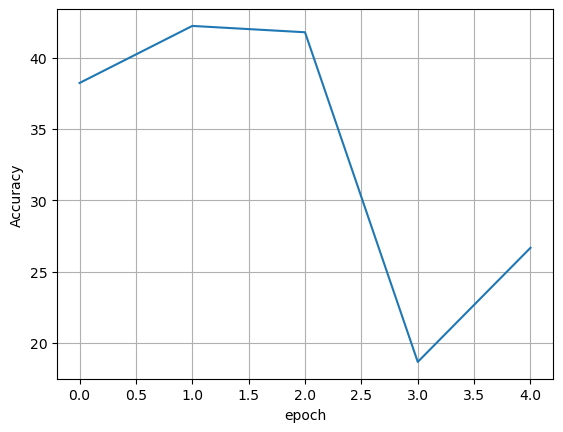

In [46]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 3, kernel_size = 2)
        self.conv2 = torch.nn.Conv2d(3, 10, kernel_size = 1)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(10, 10) 

    def forward(self, x):
        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = x.view(batch_size, -1)
        x = self.fc(x)
        return x

model = CNN()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5) 
train()

#### VGG-Net
---
VGG stands for Visual Geometry Group; it is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers. 
##### VGG-16 Architecture
The number 16 in the name VGG refers to the fact that it is 16 layers deep neural network (VGGnet). 
<br>This means that VGG16 is a pretty extensive network and has a total of around 138 million parameters. Even according to modern standards, it is a huge network.

<img src="https://viso.ai/wp-content/uploads/2021/10/VGG-16-architecture-of-the-model.jpg">


In [7]:
%pip install -i https://pypi.tuna.tsinghua.edu.cn/simple torchvision
from torchvision import models
from torchvision import transforms

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 1.2/1.2 MB 7.6 MB/s eta 0:00:00
     -------------------------------------- 172.3/172.3 MB 4.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
vgg16=models.vgg16(pretrained=True)

C:\Users\I548435\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\I548435\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\I548435/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|███████████████████████████████████████████████████████████████████████████████| 528M/528M [01:48<00:00, 5.08MB/s]


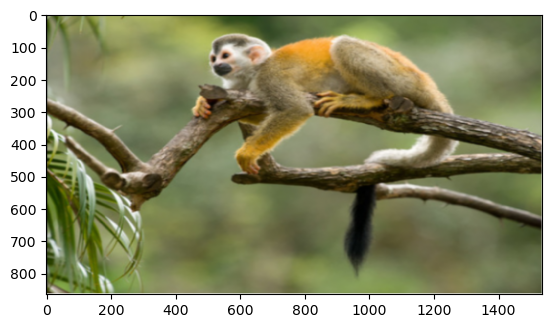

In [31]:
from PIL import Image
import matplotlib.pyplot as plt

im=Image.open("C:\\Users\\I548435\\Desktop\\fig\\test.png")
imarray=np.asarray(im)/255.0
plt.figure()
plt.imshow(imarray)
plt.show()

In [32]:
data_transforms=transforms.Compose([
    transforms.Resize((224,224)),#重置图像分辨率
    transforms.ToTensor(),#转化为张量并归一化至[0-1]
    #图像标准化处理
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
input_im=data_transforms(im).unsqueeze(0)

In [36]:
vgg16.eval()
im_pre=vgg16(input_im)

softmax=torch.nn.Softmax(dim=1)
im_pre_prob=softmax(im_pre)

In [37]:
print(im_pre_prob.shape)

torch.Size([1, 1000])


In [43]:
prob,prelab=torch.topk(im_pre_prob,5)
prob=prob.data.numpy().flatten()
prelab=prelab.numpy().flatten()
for i,lab in enumerate(prelab):
    print("index:",lab,"label:",labels[lab],"||",prob[i])
    
# squirrel monkey -> 松鼠猴

index: 382 label: squirrel monkey || 0.59306717
index: 380 label: titi || 0.3534746
index: 381 label: spider monkey || 0.049904384
index: 371 label: patas || 0.0017824111
index: 384 label: indri || 0.0011082072


In [42]:
import torchvision
labels = torchvision.models.VGG16_Weights.IMAGENET1K_V1.value.meta["categories"]

#### ResNet
---

One of the problems ResNets solve is the famous known **vanishing gradient**. 

<br>This is because when the network is too deep, the gradients from where the loss function is calculated easily shrink to zero after several applications of the chain rule. This result on the weights never updating its values and therefore, no learning is being performed.

<br>With ResNets, the gradients can flow directly through the skip connections backwards from later layers to initial filters.

##### Residual Block

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*CgSI0jjpzQGPVS4hB1EHng.png">

##### ResNet Architecture
<img src="https://pic3.zhimg.com/80/v2-7cb9c03871ab1faa7ca23199ac403bd9_hd.jpg">

In [47]:
res101 = models.resnet101(pretrained=True)

C:\Users\I548435\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\I548435\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\I548435/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100%|███████████████████████████████████████████████████████████████████████████████| 171M/171M [00:35<00:00, 5.10MB/s]


In [50]:
res101.eval()
im_pre=res101(input_im)

softmax=torch.nn.Softmax(dim=1)
im_pre_prob=softmax(im_pre)

In [58]:
import torchvision
labels = torchvision.models.ResNet101_Weights.IMAGENET1K_V1.value.meta["categories"]

In [59]:
prob,prelab=torch.topk(im_pre_prob,5)
prob=prob.data.numpy().flatten()
prelab=prelab.numpy().flatten()
for i,lab in enumerate(prelab):
    print("index:",lab,"label:",labels[lab],"||",prob[i])

# titi -> 山雀

index: 380 label: titi || 0.59581923
index: 382 label: squirrel monkey || 0.38942787
index: 381 label: spider monkey || 0.0071952976
index: 371 label: patas || 0.0031616874
index: 370 label: guenon || 0.0013637885


#### GANs

#### AE

#### Attention
---
The Attention mechanism is very similar to the logic of human viewing pictures. 
<br> When we look at a picture, we don't see the whole picture, but focus on the focus of the picture. Let's take a look at the picture below:
<img src="https://easyai.tech/wp-content/uploads/2022/08/9d826-2019-11-06-picture-jiaodian.jpg.webp" height=250px>
<br>
So when we look at an image, it actually looks like this:

<img src="https://easyai.tech/wp-content/uploads/2022/08/ce29f-2019-11-06-picture-xiaoguo.jpg.webp">
<br>
The image below is a schematic diagram of the principle behind the Encoder-Decoder framework.

<img src="https://easyai.tech/wp-content/uploads/2022/08/48015-2019-11-13-only-attention.png.webp">

#### Transformer
---
A transformer is a deep learning model. It is distinguished by its adoption of self-attention, differentially weighting the significance of each part of the input (which includes the recursive output) data. It is used primarily in the fields of natural language processing (NLP)and computer vision (CV).

##### Transfore Architecture
<img src="https://pic4.zhimg.com/80/v2-739d9498e0a36296240741be909d35f7_1440w.webp">

##### Two Layer Architecture
<img src="fig/encoder.png">

##### input & output of Transformer
An example of "Tom chase Jerry" translated into Chinese as "Tom chase Jerry"
<br> The inputs of Encoder are the word vector after the word segmentation of "Tom chase Jerry" plus positional information. It can be any form of word vector, such as word2vec, GloVe, one hot encoding. 
<br> After decoder, the moder obtain the probability distribution of the words, and then use a dictionary to output the word with the highest probability as our prediction output.

#### Stable Diffusion

#### Reinforcement Learning

#### Bert

#### GPT-3.5